In [14]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

scope = pd.read_csv(r"/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/project_1/output/scope.csv")
scope = scope.loc[scope["coin"] == "btc"]
scope["period"] = scope["date"].astype("str")
#scope

#weekly candlesticks:
# Converting date to pandas datetime format
scope['date'] = pd.to_datetime(scope['date'])
# Getting week number
scope['week_number'] = scope['date'].dt.week
# Grouping based on required values
weekly_scope = scope.groupby(['year', 'week_number'], as_index=False).agg({'open':'first', 'high':'max', 'low':'min', 'close':'last', 'volume':'sum', 'market_cap':"mean", "circulating_supply":"mean"})
weekly_scope["period"] = weekly_scope["year"].astype("str") + "-" + weekly_scope["week_number"].astype("str")
#weekly_scope

#monthly candlesticks:
# Grouping based on required values
monthly_scope = scope.groupby(['year','month'], as_index=False).agg({'open':'first', 'high':'max', 'low':'min', 'close':'last', 'volume':'sum', 'market_cap':"mean", "circulating_supply":"mean"})
monthly_scope["period"] = monthly_scope["year"].astype("str") + "-" + monthly_scope["month"].astype("str")
#monthly_scope

#semester candlesticks:
def semester(month):
    if month > 6:
        return 2
    else:
        return 1
# Getting week number
scope['semester'] = scope["month"].apply(semester)
# Grouping based on required values
semester_scope = scope.groupby(['year','semester'], as_index=False).agg({'open':'first', 'high':'max', 'low':'min', 'close':'last', 'volume':'sum', 'market_cap':"mean", "circulating_supply":"mean"})
semester_scope["period"] = semester_scope["year"].astype("str") + "-" + semester_scope["semester"].astype("str")
#semester_scope

Text(0.5, 1.0, 'semester_scope')

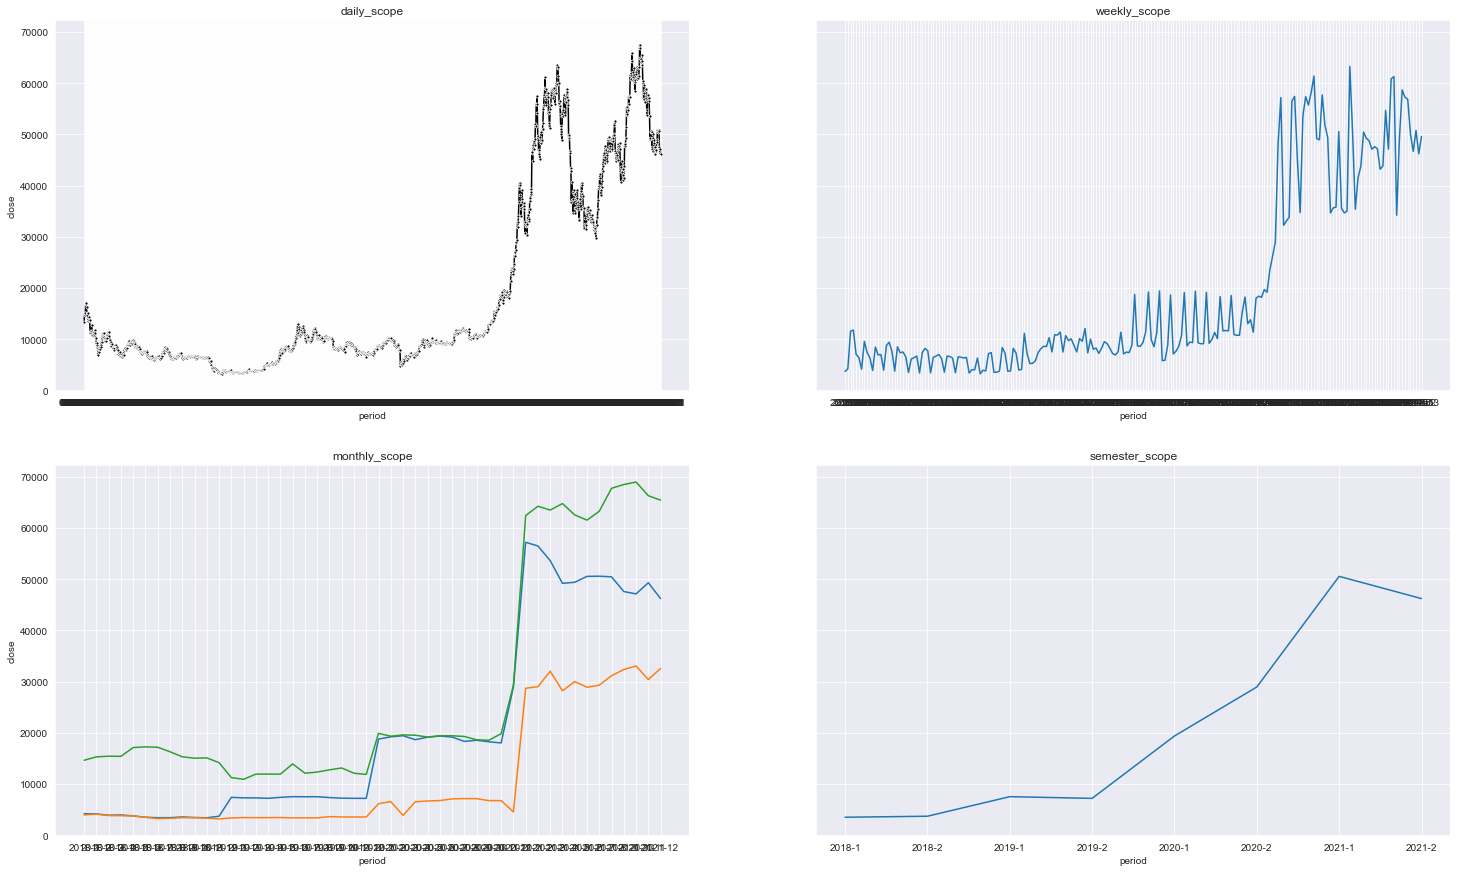

In [17]:
#price analysis
fig, axes = plt.subplots(2, 2, figsize=(25, 15), sharex=False, sharey=True)

sns.lineplot(data=scope, x="period", y="close", ax=axes[0,0], color = "black", marker = "o", markersize = 3)
axes[0,0].set_title("daily_scope")
sns.lineplot(data=weekly_scope, x="period", y="close", ax=axes[0,1])
axes[0,1].set_title("weekly_scope")
sns.lineplot(data=monthly_scope, x="period", y="close", ax=axes[1,0])
sns.lineplot(data=monthly_scope, x="period", y="low", ax=axes[1,0])
sns.lineplot(data=monthly_scope, x="period", y="high", ax=axes[1,0])
axes[1,0].set_title("monthly_scope")
sns.lineplot(data=semester_scope, x="period", y="close", ax=axes[1,1])
axes[1,1].set_title("semester_scope")


<AxesSubplot:xlabel='period', ylabel='circulating_supply'>

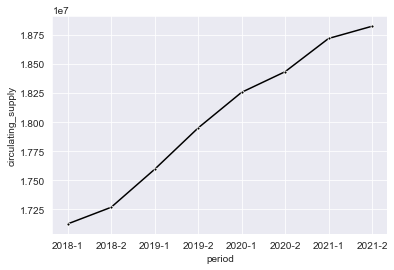

In [3]:
#halving analysis
sns.lineplot(data=semester_scope, x="period", y="circulating_supply", color = "black", marker = "o", markersize = 3)